1.Basic feature extraction using text data
    Number of words
    Number of characters
    Average word length
    Number of stopwords
    Number of special characters
    Number of numerics
    Number of uppercase words
    
    
    


In [1]:
import pandas as pd
import os

In [6]:
data_train = pd.read_json(r"C:/Users/pavan/Desktop/sarcasm/data/Sarcasm_Headlines_Dataset.json", lines=True)
data_test = pd.read_json(r"C:/Users/pavan/Desktop/sarcasm/data/Sarcasm_Headlines_Dataset_v2.json", lines=True)

In [7]:
data_train

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


# DATA VISUALIZATION AND PREPROCESSING

In [8]:
data_train.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [9]:
data_test.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [10]:
#drop the  article link
del data_train['article_link']
del data_test['article_link']


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

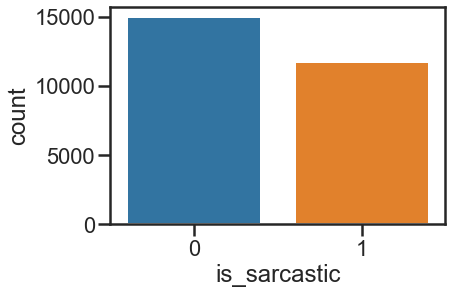

In [18]:
# counting the sarcastic
import seaborn as sns

sns.set_style("ticks")
sns.set_context("poster")
sns.plotting_context()
sns.countplot(data_train.is_sarcastic)


<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

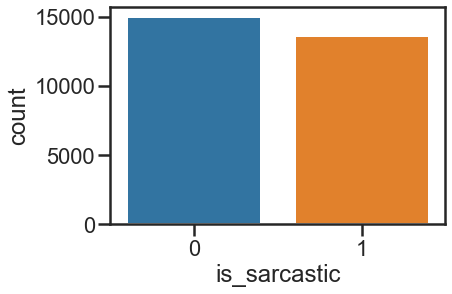

In [17]:
sns.countplot(data_test.is_sarcastic)

# Basic feature extraction using text data

In [36]:
import re
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [39]:
sarcasm_data_train['clean_headline'] = sarcasm_data_train['headline'].apply(denoise_text)

In [40]:
sarcasm_data_train.to_csv(r"C:/Users/pavan/Desktop/sarcasm/data/sarcasm_data_train.csv")